In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/chandan.narad/Desktop/assignment_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
df.replace(' ?', '', inplace=True)
print(df.iloc[[27]])

    age workclass  fnlwgt      education  education-num       marital-status  \
27   54            180211   Some-college             10   Married-civ-spouse   

   occupation relationship                 race    sex  capital-gain  \
27                 Husband   Asian-Pac-Islander   Male             0   

    capital-loss  hours-per-week native-country income  
27             0              60          South   >50K  


In [6]:
duplicates = df.duplicated()

# Drop duplicate values
df.drop_duplicates(inplace=True)

In [7]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

print(df)

       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [8]:
print(df['income'].dtype)

object


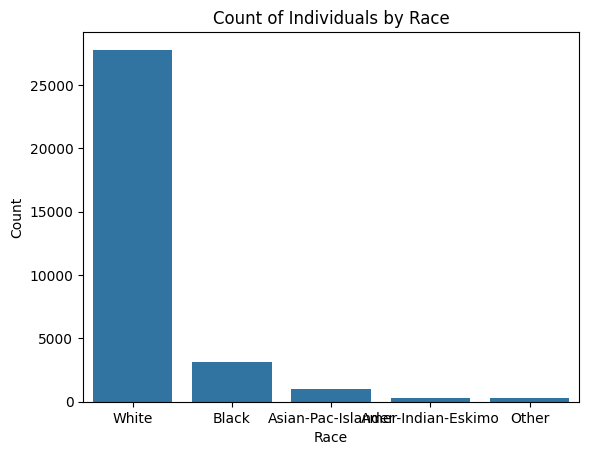

In [9]:
sns.countplot(data=df, x='race')
plt.title('Count of Individuals by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Count of people according to their Education')

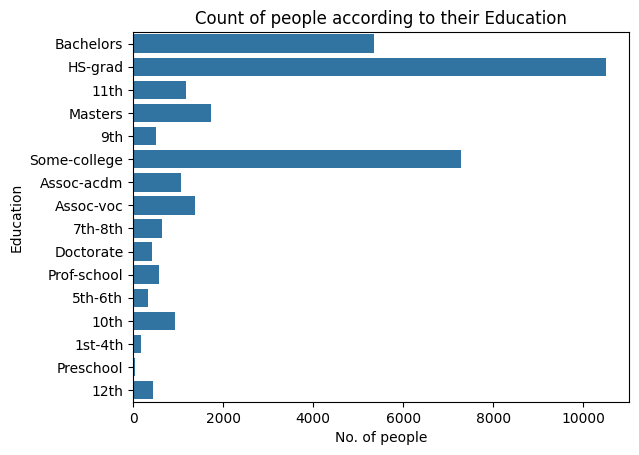

In [10]:
sns.countplot(df['education'])
plt.xlabel('No. of people')
plt.ylabel('Education')
plt.title('Count of people according to their Education')

In [11]:
print(f"Ratio above 50k : {(df['income'] == '>50K').astype('int').sum() / df.shape[0] * 100 :.2f}%")

Ratio above 50k : 24.09%


In [12]:
num_feat = df.select_dtypes(include=['int64']).columns
num_feat

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

NameError: name 'fun2' is not defined

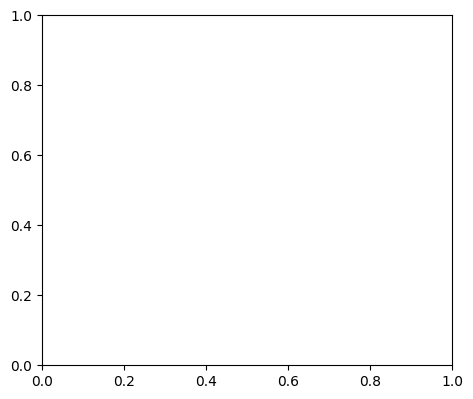

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(231)

i = 0
for c in fun2:
    plt.subplot(2, 3, i + 1)
    i += 1
    sns.kdeplot(df[df['sex'] == 'Male'][c], color='blue', label='Male')
    sns.kdeplot(df[df['sex'] == 'Female'][c], color='red', label='Female')
    plt.title(c)
    plt.legend()

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Example dataset (Replace this with your actual data)
# Assuming df is your DataFrame and 'target' is your target column
df = pd.read_csv('your_dataset.csv')  # Replace with your dataset
X = df.drop('target', axis=1)  # Replace 'target' with your target column
y = df['target']  # Replace 'target' with your target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the print_score function
def print_score(model, name):
    model.fit(X_train, y_train)
    print('Accuracy score of the', name, f': on train = {model.score(X_train, y_train)*100:.2f}%, on test = {model.score(X_test, y_test)*100:.2f}%')

# Initialize and train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Use the print_score function to evaluate the KNN model
print_score(knn, 'K-Nearest Neighbors')
